In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
# import networkx as nx
%matplotlib inline

In [10]:
attributes=json.loads(open('graph_data_a.json','r').read())
attributes=np.array(attributes)
attributes.shape

(3428, 17)

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [12]:

node_type_num=9
color=['red','blue','green','yellow','black','pink','purple','orange','brown']
model = KMeans(n_clusters=9)
y_cluster = model.fit_predict(attributes)


In [13]:
pca = PCA(n_components=2)
attr_2d=pca.fit_transform(attributes)


(2703, 2)
(5, 2)
(68, 2)
(36, 2)
(11, 2)
(4, 2)
(221, 2)
(347, 2)
(33, 2)


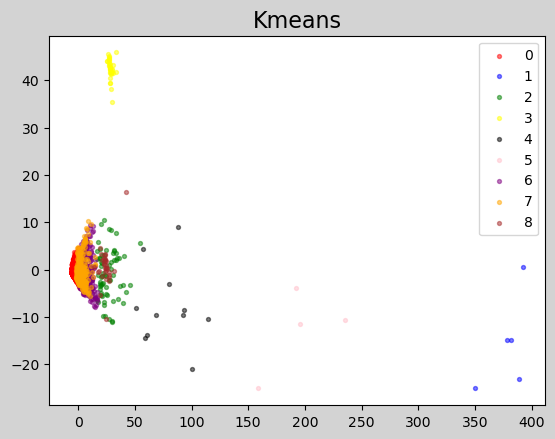

6 5 0 6


In [16]:
plt.figure('Kmeans', facecolor='lightgray')
plt.title('Kmeans', fontsize=16)
plt.tick_params(labelsize=10)

for i in range(9):
    x_tmp=attr_2d[y_cluster==i]
    plt.scatter(x_tmp[:, 0], x_tmp[:, 1], s=8, c=color[i], label=i,alpha=0.5)
plt.legend()
plt.show()
print(y_cluster[386],y_cluster[901],y_cluster[3172],y_cluster[3177])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
(3428, 2)
(2400, 2)
(9, 2)
(5, 2)
(11, 2)
(3, 2)
(4, 2)
(3, 2)
(3, 2)
(4, 2)
(5, 2)
(5, 2)
(976, 2)


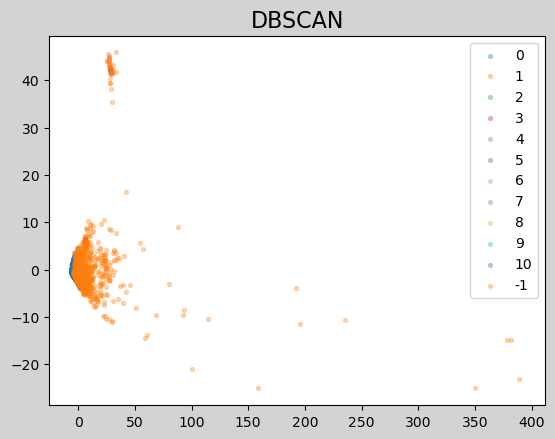

In [78]:

from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1.9,min_samples=3)
y_dbscan=dbscan.fit_predict(attributes)
plt.figure('DBSCAN', facecolor='lightgray')
plt.title('DBSCAN', fontsize=16)
plt.tick_params(labelsize=10)
label=set(y_dbscan.tolist())
print(label)
print(attr_2d.shape)
for idx,i in enumerate(label):
    x_tmp=attr_2d[y_dbscan==i]
    print(x_tmp.shape)
    plt.scatter(x_tmp[:, 0], x_tmp[:, 1], s=8, label=i,alpha=0.3)
plt.legend()
plt.show()

eps越大噪声点越少，就是分的越粗糙